In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [50]:
#Loading original dataset
booking = pd.read_csv('wine-quality-white-and-red.csv')
df = booking[["fixed acidity", "volatile acidity", "citric acid","residual sugar","chlorides","free sulfur dioxide",
          "total sulfur dioxide","density","pH","sulphates","alcohol","type"]]

In [51]:
df['type'] = LabelEncoder().fit_transform(df['type'])

In [52]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [53]:
#Loading generated dataset
df2 = pd.read_csv('wine2.csv')
df2['type'] = LabelEncoder().fit_transform(df2['type'])
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,25.0,1
9996,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,26.0,1
9997,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,27.0,1
9998,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,28.0,1


In [54]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [55]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [56]:
outliers_IF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,25.0,1,-1
9996,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,26.0,1,-1
9997,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,27.0,1,-1
9998,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,28.0,1,-1


In [57]:
inliers_IF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF


In [58]:
def is_inlier(row):
    # Fixed Acidity constraint: 3.5 < Fixed Acidity < 16
    if row['fixed acidity'] < 3.5 or row['fixed acidity'] > 16:
            return -1
    
    # Volatile Acidity constraint: 0.05 < Volatile Acidity < 1.6
    if row['volatile acidity'] < 0.05 or row['volatile acidity'] > 1.6:
            return -1
        
    # Citric Acid constraint: 0.0 < Citric Acid < 1.7
    if row['citric acid'] < 0 or row['citric acid'] > 1.7:
            return -1
        
    # Residual Sugar constraint: 0.5 < Residual Sugar < 70
    if row['residual sugar'] < 0.5 or row['residual sugar'] > 70:
            return -1
        
    # Chlorides constraint: 0.0 < Chlorides < 0.65
    if row['chlorides'] < 0 or row['chlorides'] > 0.65:
            return -1
        
    # Free Sulfur Dioxide constraint: 0.5 < Free Sulfur Dioxide < 300
    if row['free sulfur dioxide'] < 0.5 or row['free sulfur dioxide'] > 300:
            return -1
    
    # Total Sulfur Dioxide constraint: 5 < Total Sulfur Dioxide < 450
    if row['total sulfur dioxide'] < 5 or row['total sulfur dioxide'] > 450:
            return -1
    
    # Density constraint: 0.98 < Density < 1.05
    if row['density'] < 0.98 or row['density'] > 1.05:
            return -1
    
    # pH constraint: 2.7 < pH < 4.1
    if row['pH'] < 2.7 or row['pH'] > 4.1:
            return -1
    
    # Sulphates constraint: 0.1 < Sulphates < 2.1
    if row['sulphates'] < 0.1 or row['sulphates'] > 2.1:
            return -1
    
    # Alcohol constraint: 7% < Alcohol < 15%
    if row['alcohol'] < 7 or row['alcohol'] > 15:
            return -1
    
    # If all constraints are satisfied, return 1
    return 1

In [59]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [60]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF,is_inlier_HW
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,-1,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1,-1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1,-1
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1,-1
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,25.0,1,-1,-1
9996,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,26.0,1,-1,-1
9997,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,27.0,1,-1,-1
9998,100.0,100.0,100.0,0.0,100.0,100.0,0.0,78.0,0.0,0.0,28.0,1,-1,-1


In [61]:
inliers_HW

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF,is_inlier_HW


In [62]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [63]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [64]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [65]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[10000]])

Text(95.72222222222221, 0.5, 'Handwritten')

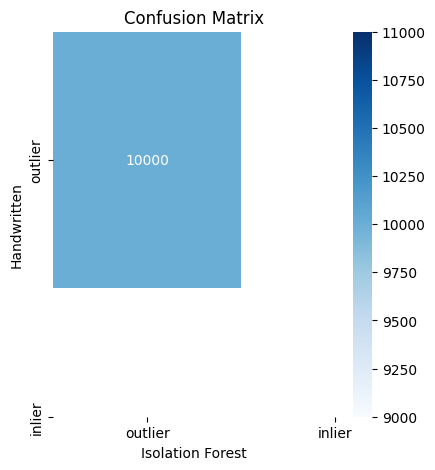

In [66]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [67]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [68]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")